In [20]:
import sys
print("Python Version:", sys.version)

!pip list


Python Version: 3.12.1 (tags/v3.12.1:2305ca5, Dec  7 2023, 22:03:25) [MSC v.1937 64 bit (AMD64)]
Package           Version
----------------- -----------
asttokens         2.4.1
blinker           1.8.2
click             8.1.7
colorama          0.4.6
comm              0.2.2
contourpy         1.3.0
cycler            0.12.1
debugpy           1.8.5
decorator         5.1.1
executing         2.1.0
Flask             3.0.3
fonttools         4.53.1
ipykernel         6.29.5
ipython           8.27.0
itsdangerous      2.2.0
jedi              0.19.1
Jinja2            3.1.4
joblib            1.4.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.7
MarkupSafe        2.1.5
matplotlib        3.9.2
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.1.1
packaging         24.1
pandas            2.2.2
parso             0.8.4
patsy             0.5.6
pillow            10.4.0
pip               24.2
platformdirs      4.3.6
prompt_toolkit    3.0.47
psutil            6.0.0
pu

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler ,PowerTransformer
from sklearn.linear_model  import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold,train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,precision_score,recall_score
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import pickle


In [22]:
data = pd.read_csv('city_day.csv')

In [23]:
data


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [24]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [25]:
data.columns.dtype

dtype('O')

In [26]:
data.shape

(29531, 16)

In [27]:
data.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,14-03-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


In [28]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [29]:
null_percentage=data.isnull().mean() * 100
null_percentage

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [30]:
columns_to_drop = null_percentage[null_percentage > 16.0].index

# Drop those columns from the DataFrame
data1 = data.drop(columns=columns_to_drop)


In [31]:
data1.isnull().sum()

City             0
Date             0
PM2.5         4598
NO            3582
NO2           3585
NOx           4185
CO            2059
SO2           3854
O3            4022
AQI           4681
AQI_Bucket    4681
dtype: int64

In [32]:
columns_to_drop

Index(['PM10', 'NH3', 'Benzene', 'Toluene', 'Xylene'], dtype='object')

In [33]:
data2 = data1.drop(columns='AQI_Bucket')

In [37]:
data2.columns
data2=data2.drop(columns=['City','Date'])

In [39]:
data3=data2.fillna(data2.mean())

In [40]:
data3.isnull().sum()

PM2.5    0
NO       0
NO2      0
NOx      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [41]:
#handling outliers

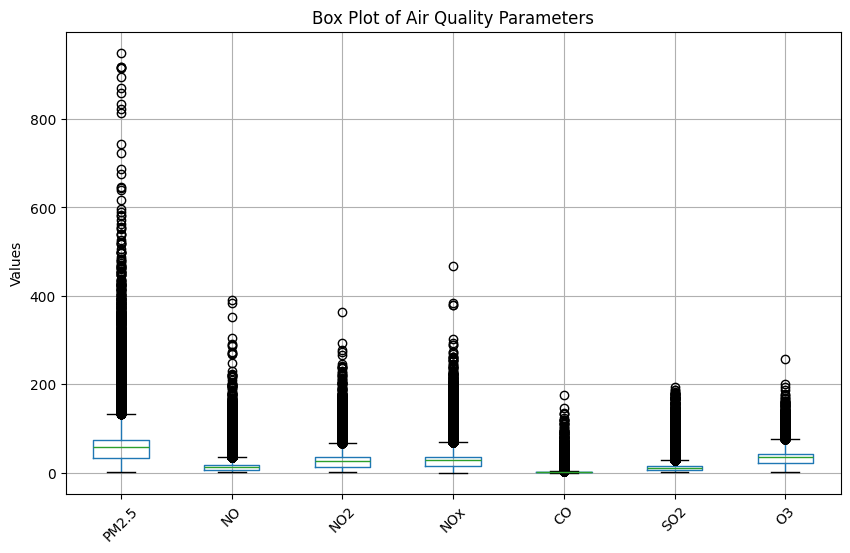

In [42]:
columns_to_plot = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']

plt.figure(figsize=(10, 6))  
data3[columns_to_plot].boxplot()


plt.title('Box Plot of Air Quality Parameters')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.ylabel('Values')

# Show the plot
plt.show()

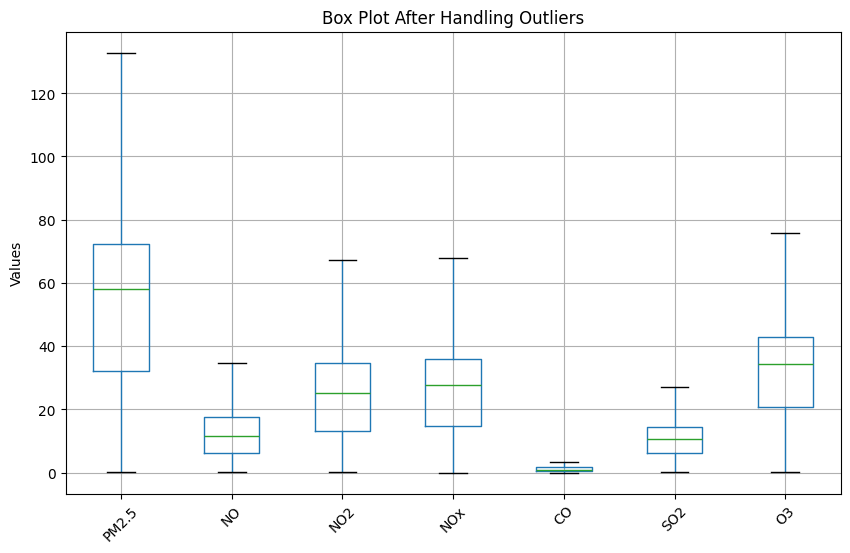

In [43]:
def cap_outliers_iqr(data3, columns):
    for col in columns:
        Q1 = data3[col].quantile(0.25)
        Q3 = data3[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap the values
        data3[col] = np.where(data3[col] < lower_bound, lower_bound,
                              np.where(data3[col] > upper_bound, upper_bound, data3[col]))
    return data3

# Cap outliers for the selected columns
data4 = cap_outliers_iqr(data3, columns_to_plot)

# Visualize after capping outliers
plt.figure(figsize=(10, 6))
data4[columns_to_plot].boxplot()
plt.title('Box Plot After Handling Outliers')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.show()


In [44]:
#Transformation

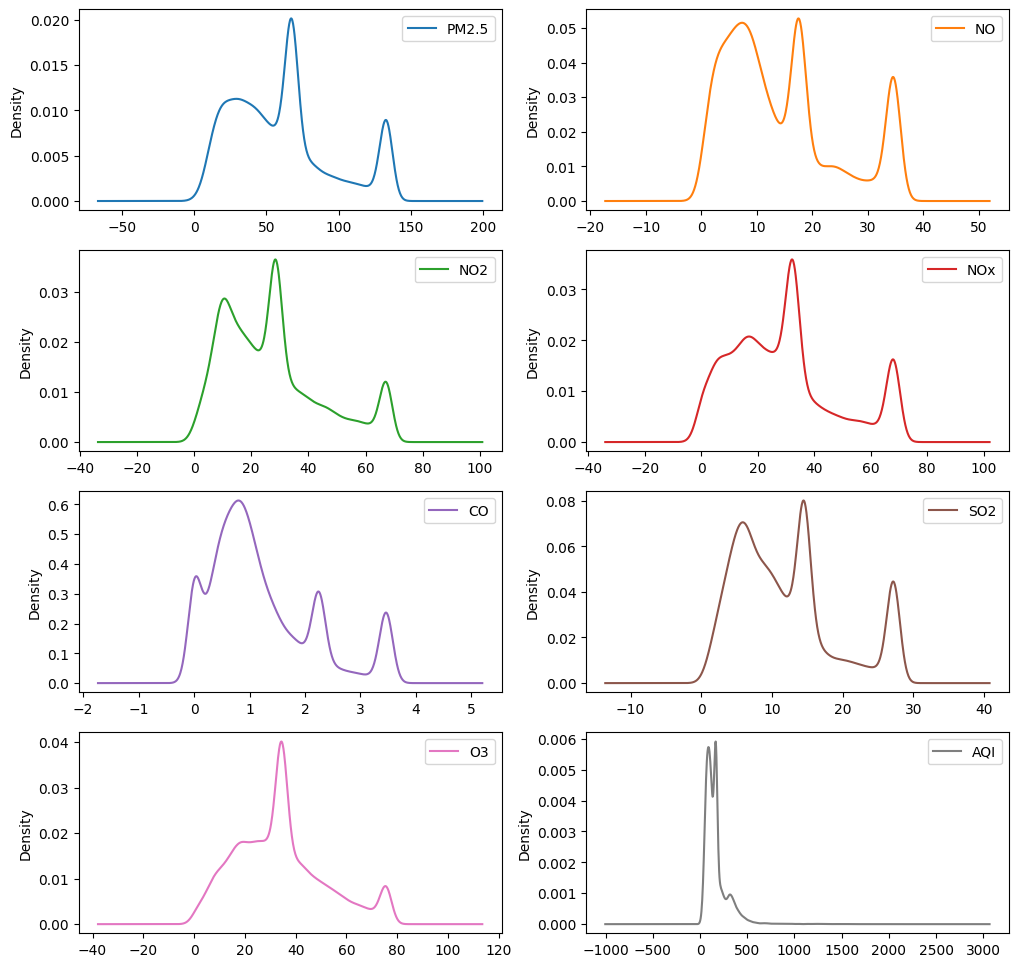

In [45]:
data4.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

In [46]:
data4_copy = data4.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Specify the columns to scale
columns_to_scale = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']

# Fit the scaler on the specified columns and transform them in the copy
data4_copy[columns_to_scale] = scaler.fit_transform(data4_copy[columns_to_scale])

# Create the new DataFrame (data4) with the unchanged and scaled columns
data5 = data4_copy[ columns_to_scale + ['AQI']]

In [47]:
# Create a copy of data5 to avoid affecting the original DataFrame
data5_copy = data5.copy()

# Initialize the PowerTransformer with Yeo-Johnson method
transformer = PowerTransformer(method='yeo-johnson')

# Specify the columns to transform
columns_to_transform = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']

# Fit the transformer on the specified columns and transform them in the copy
data5_copy[columns_to_transform] = transformer.fit_transform(data5_copy[columns_to_transform])

# Create the new DataFrame (data6) with the unchanged and transformed columns
data6 = data5_copy[columns_to_transform + ['AQI']]


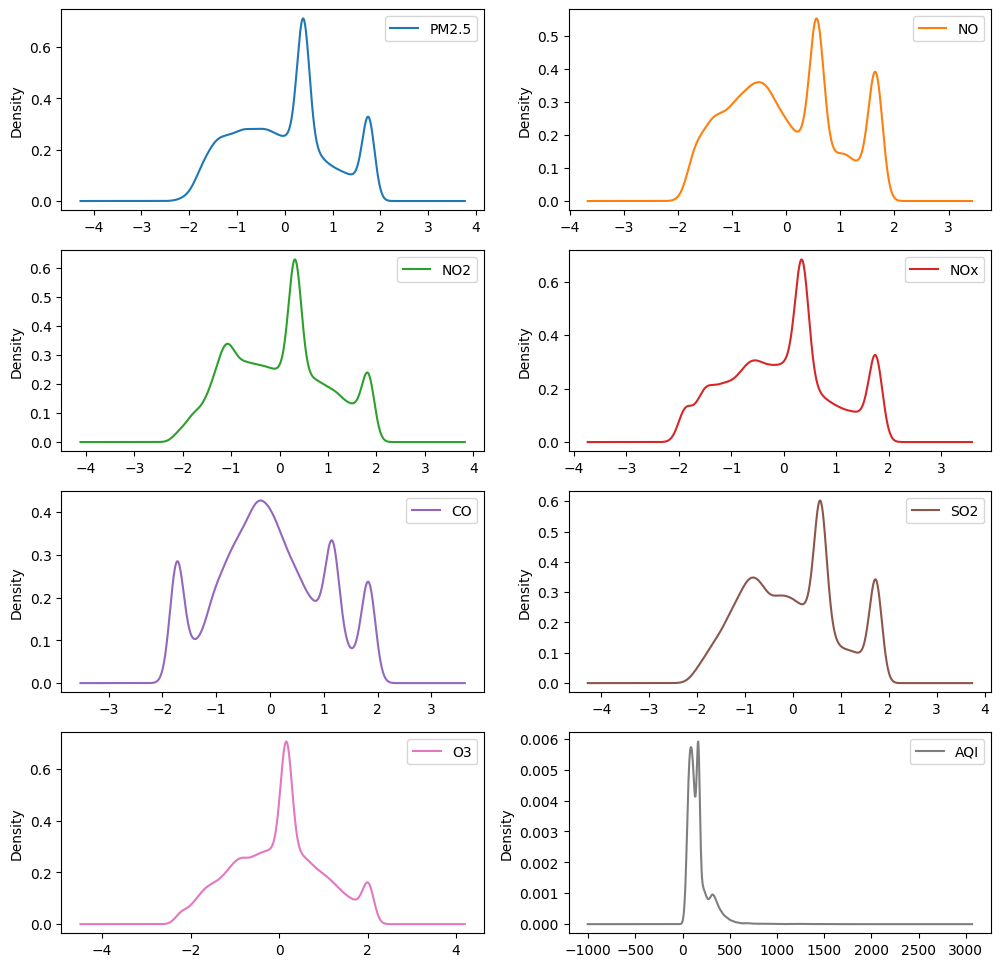

In [48]:
data6.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

In [49]:
columnsx = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
X=data6[columnsx]
y=data6['AQI']

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate model using K-Fold Cross Validation
def evaluate_model(model, X, y):
    mse_list = []
    r2_list = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        mse_list.append(mse)
        r2_list.append(r2)

    return sum(mse_list) / len(mse_list), sum(r2_list) / len(r2_list)

# Evaluate each model using K-Fold Cross Validation
rf_cv_mse, rf_cv_r2 = evaluate_model(rf_model, X, y)
gb_cv_mse, gb_cv_r2 = evaluate_model(gb_model, X, y)
lr_cv_mse, lr_cv_r2 = evaluate_model(lr_model, X, y)



In [50]:
# Print the K-Fold Cross Validation results
print("Random Forest     - K-Fold CV Root Mean Squared Error:", rf_cv_mse**0.5)
print("Random Forest     - K-Fold CV R^2 Score:", rf_cv_r2)

print("\nGradient Boosting - K-Fold CV Root Mean Squared Error:", gb_cv_mse**0.5)
print("Gradient Boosting - K-Fold CV R^2 Score:", gb_cv_r2)

print("\nLinear Regression - K-Fold CV Root Mean Squared Error:", lr_cv_mse**0.5)
print("Linear Regression - K-Fold CV R^2 Score:", lr_cv_r2)

Random Forest     - K-Fold CV Root Mean Squared Error: 53.995535408020295
Random Forest     - K-Fold CV R^2 Score: 0.8256471029299514

Gradient Boosting - K-Fold CV Root Mean Squared Error: 57.78306333904403
Gradient Boosting - K-Fold CV R^2 Score: 0.8003617655569487

Linear Regression - K-Fold CV Root Mean Squared Error: 90.51537643844487
Linear Regression - K-Fold CV R^2 Score: 0.5091936402378217


In [51]:
# saving the model to the local file system
filename = 'aqi_rf_model.pkl'
pickle.dump(rf_model, open(filename, 'wb'))

In [52]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [53]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[65.04,14.19,30.1,44.21,14.19,65.91,31.88]]))
a

c:\Users\PRATHAMESH\Desktop\BE\ML\mini_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PRATHAMESH\Desktop\BE\ML\mini_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([281.74854326])

In [54]:
#cols C E F G I J K
#44 TSTED ABOVE
#17180 43.55, 48.46, 18.45, 50.12, 0.72, 10.26, 42.7

In [55]:
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
B=loaded_model.predict(scaler.transform([[43.55, 48.46, 18.45, 50.12, 0.72, 10.26, 42.7]]))
B

c:\Users\PRATHAMESH\Desktop\BE\ML\mini_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\PRATHAMESH\Desktop\BE\ML\mini_project\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([109.47463581])